# Generatori di numeri pseudocasuali in python

Cominciamo ad utilizzare il modulo ```random``` che contiene un algoritmo per la generazione di numeri casuali uniformi tra 0 e 1. 

Nel seguito introdurremo altre librerie che contengono generatori con distribuzioni non uniformi, dopo che avremo definito meglio cosa si intende per *distribuzione*.

La documentazione si trova facilmente con Google. Di seguito alcuni link:
* <a href="https://docs.python.org/3/library/random.html">random</a> (python.org)
* <a href="https://www.w3schools.com/python/module_random.asp">Python Random Module</a> (W3School)

In [4]:
import random
help(random.random)

Help on built-in function random:

random(...) method of random.Random instance
    random() -> x in the interval [0, 1).



Da notare: usando lo stesso *seed* la sequenza è riproducibile.

Se non si inizializza il *seed*, viene inizializzato dall'orario di sistema.

In [5]:
random.seed(12345)

In [6]:
for i in range(10):
    print(random.random())

0.41661987254534116
0.010169169457068361
0.8252065092537432
0.2986398551995928
0.3684116894884757
0.19366134904507426
0.5660081687288613
0.1616878239293682
0.12426688428353017
0.4329362680099159


Per generare numeri casuali da un minimo $a$ ad un massimo $b$ basta:
* generare un numero casuale con ```random.random()```
* moltiplicare per $b-a$
* sommare $a$
Il risultato sarà compreso in $[a,\,b)$

In [7]:
def rnd_ab(a, b):
    return a+(b-a)*random.random()
for i in range(10):
    print(rnd_ab(-2,2))

0.24831395230337172
-1.3026257571050728
0.21288434227731923
-0.5803944546536051
1.8322591403981945
-1.6348236044930595
1.9145599822816401
-0.351522428242796
0.015741472440149895
-1.4074153242792433


...ma questa funzionalità si ottiene dando $a$ e $b$ come argomenti della funzione ```random```:

In [8]:
for i in range(10):
    print(random.uniform(-2,2))

0.8758685612035402
-1.2401144851127186
-0.6337582969057913
-1.9059151274311978
-0.6419289104083172
1.8699298355194856
1.9151938167426272
0.9781201605641385
-1.9861815569796177
1.7609540123909713


... a questo punto, abbiamo degli strumenti per generare numeri casuali e simulare, quindi, i risultati di un esperimento.

Però, dobbiamo definire meglio cosa significa:
* Probabilità
* Distrubuzione di probabilità

# Spunti per esercizi

Generare grafici delle distribuzioni d numeri casuali generati con il modulo ```random```:
1. uniformi tra 0 e 1, come dalla funzione ```random()```
* uniformi tra due valori $a$ e $b$, come indicato sopra
* graficare la distribuzione di $x^2$, dove $x$ è un numero random uniformemente distribuito oppure di $e^x$ o $\mathrm{log}(x)$ o $1/x$

In [116]:
import numpy as np
nrand = 100000
x = np.array([random.random() for n in range(nrand)])

In [117]:
import matplotlib.pyplot as plt
import math

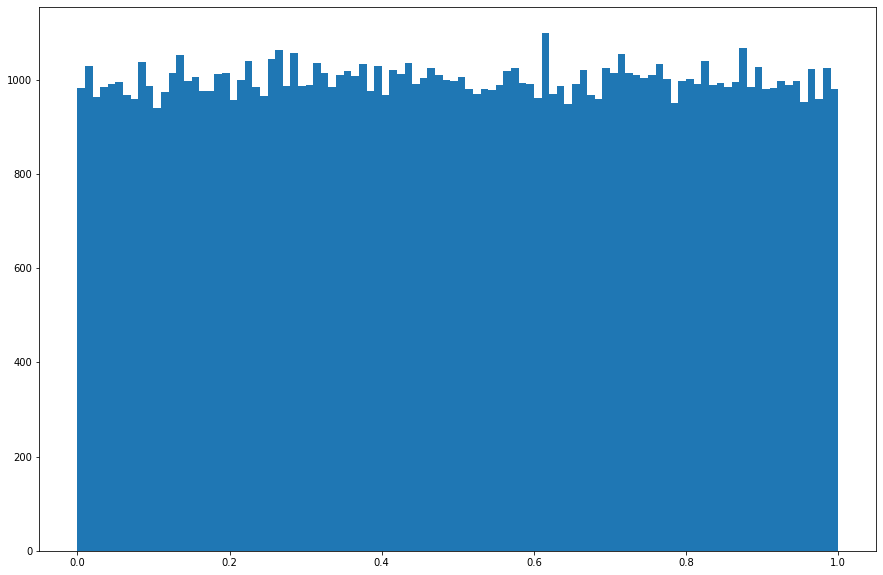

In [118]:
nbins = 100
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, patches = ax.hist(x, nbins, range=(0,1))
plt.show()

In [119]:
n

array([ 983., 1030.,  963.,  985.,  990.,  995.,  967.,  960., 1038.,
        986.,  940.,  974., 1015., 1053.,  997., 1006.,  975.,  976.,
       1013., 1014.,  957., 1000., 1039.,  984.,  965., 1043., 1064.,
        987., 1057.,  987.,  988., 1036., 1015.,  985., 1011., 1018.,
       1007., 1034.,  976., 1029.,  968., 1020., 1012., 1036.,  990.,
       1004., 1025., 1009.,  999.,  998., 1006.,  981.,  969.,  980.,
        979.,  988., 1019., 1024.,  992.,  990.,  962., 1099.,  970.,
        986.,  948.,  991., 1021.,  967.,  960., 1024., 1014., 1054.,
       1014., 1010., 1003., 1009., 1034., 1001.,  950.,  997., 1001.,
        990., 1039.,  988.,  992.,  984.,  995., 1067.,  984., 1027.,
        981.,  982.,  998.,  989.,  997.,  953., 1023.,  960., 1025.,
        980.])

In [120]:
bins

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [121]:
deltax = (bins-np.roll(bins,1))[1:]
deltax

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [122]:
n/deltax/n.sum()

array([0.983, 1.03 , 0.963, 0.985, 0.99 , 0.995, 0.967, 0.96 , 1.038,
       0.986, 0.94 , 0.974, 1.015, 1.053, 0.997, 1.006, 0.975, 0.976,
       1.013, 1.014, 0.957, 1.   , 1.039, 0.984, 0.965, 1.043, 1.064,
       0.987, 1.057, 0.987, 0.988, 1.036, 1.015, 0.985, 1.011, 1.018,
       1.007, 1.034, 0.976, 1.029, 0.968, 1.02 , 1.012, 1.036, 0.99 ,
       1.004, 1.025, 1.009, 0.999, 0.998, 1.006, 0.981, 0.969, 0.98 ,
       0.979, 0.988, 1.019, 1.024, 0.992, 0.99 , 0.962, 1.099, 0.97 ,
       0.986, 0.948, 0.991, 1.021, 0.967, 0.96 , 1.024, 1.014, 1.054,
       1.014, 1.01 , 1.003, 1.009, 1.034, 1.001, 0.95 , 0.997, 1.001,
       0.99 , 1.039, 0.988, 0.992, 0.984, 0.995, 1.067, 0.984, 1.027,
       0.981, 0.982, 0.998, 0.989, 0.997, 0.953, 1.023, 0.96 , 1.025,
       0.98 ])

$\displaystyle \rho(x)=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\simeq\frac{1}{N}\frac{\Delta N}{\Delta x}=1$

Se passiamo da $x$ a $y=x^2$ la densità di valori non è più una costante:

$\displaystyle \rho(y=x^2)=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}y}=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\frac{\mathrm{d}x}{\mathrm{d}y} = \frac{1}{\mathrm{d}x^2/\mathrm{d}x} = \frac{1}{2x} = \frac{1}{2\sqrt{y}}$

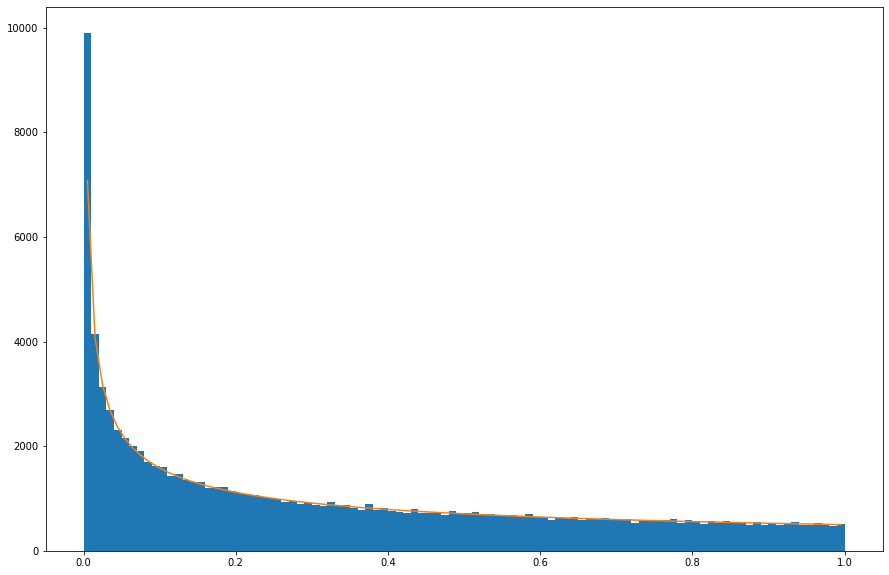

In [138]:
nbins = 100
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, patches = ax.hist(x**2, nbins, range=(0, 1))
xx = np.linspace(dx/2, 1-dx/2, nbins)
dx = 1/nbins
yy = (1/(2*np.sqrt(xx)))*nrand*dx
ax.plot(xx, yy)
plt.show()

Se passiamo da $x$ a $y=e^x$ la densità di valori diventa:

$\displaystyle \rho(y=e^x)=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}y}=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\frac{\mathrm{d}x}{\mathrm{d}y} = \frac{1}{\mathrm{d}e^x/\mathrm{d}x} = \frac{1}{e^x} = \frac{1}{y}$

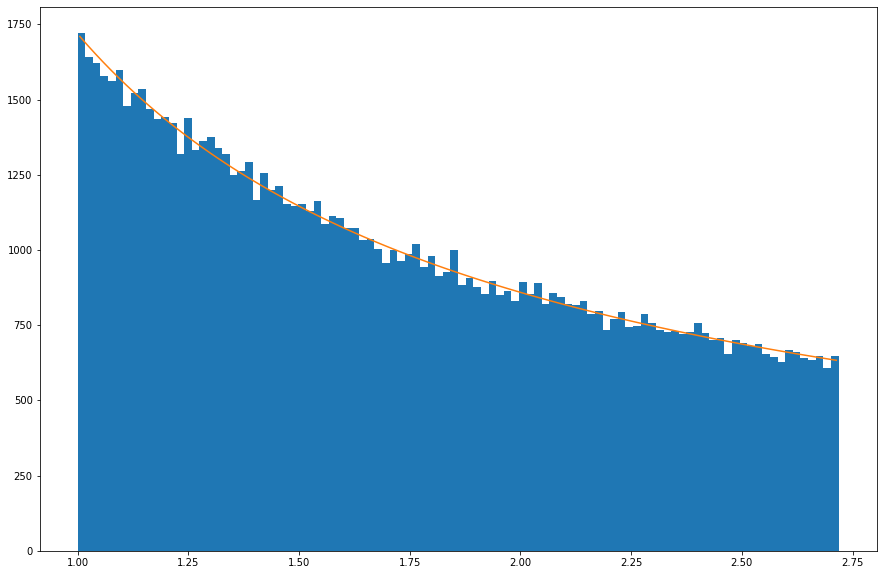

In [140]:
nbins = 100
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, patches = ax.hist(np.exp(x), nbins, range=(1, math.e))
xx = np.linspace(1+dx/2, math.e-dx/2, nbins)
dx = (math.e-1)/nbins
yy = (1/xx)*nrand*dx
ax.plot(xx, yy)
plt.show()

Se passiamo da $x$ a $y=\log x$ la densità di valori diventa:

$\displaystyle \rho(y=\log x)=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}y}=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\frac{\mathrm{d}x}{\mathrm{d}y} = \frac{1}{\mathrm{d}\log y/\mathrm{d}x} = x = e^y$

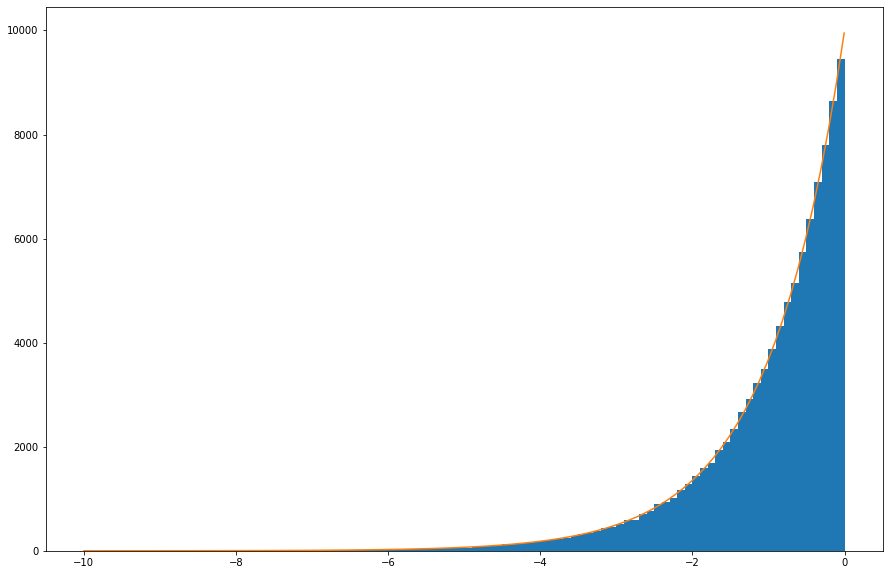

In [143]:
nbins = 100
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, patches = ax.hist(np.log(x), nbins, range=(-10,0))
xx = np.linspace(-10+dx/2, 0-dx/2, nbins)
dx = 10/nbins
yy = np.exp(xx)*nrand*dx
ax.plot(xx, yy)
plt.show()

Se passiamo da $x$ a $y=1/x$ la densità di valori diventa:

$\displaystyle \rho(y=\log x)=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}y}=\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\left|\frac{\mathrm{d}x}{\mathrm{d}y}\right| = \left|\frac{\mathrm{d}1/y}{\mathrm{d}x}\right| = \frac{1}{x^2}$

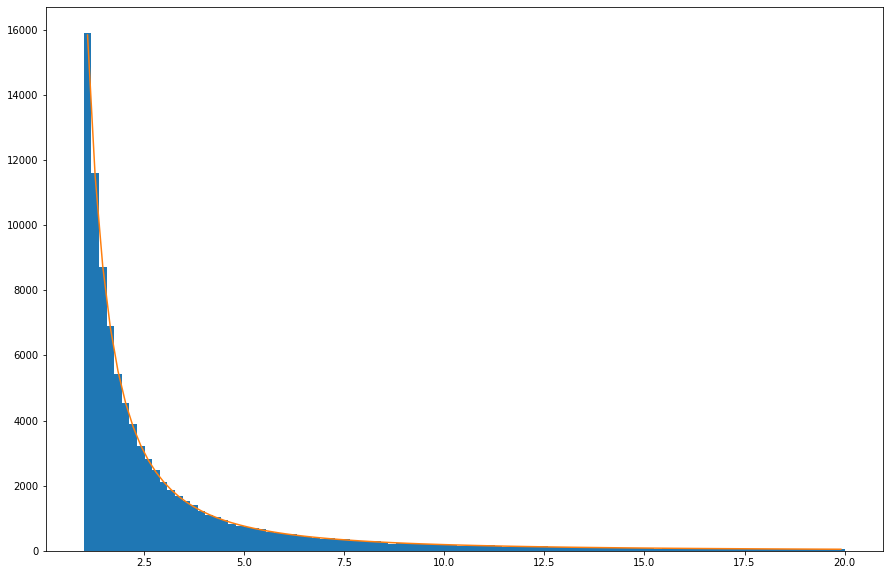

In [145]:
nbins = 100
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, patches = ax.hist(1/x, nbins, range=(1,20))
xx = np.linspace(1+dx/2, 20-dx/2, nbins)
dx = 19/nbins
yy = 1/xx**2*nrand*dx
ax.plot(xx, yy)
plt.show()